# DAY 1 

# Solving our bias and flats to find the average as well as the averages of the variance 

In [ ]:
#We write the pathway to our bias and flats files and find the mean of our bias so that we can subtract from our flats.
#We then average these values and find the variance of the averages so that we can plot both values of the flats to 
#find gain and eventually read noise. 

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit 

biasD1 = []
for i in range(1,11):
    biasD1.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 1/Bias-" + "0"*(4-len(str(i))) + str(i) + ".fit", ext=0).astype(np.int))

    
    

In [56]:
np.array(biasD1).shape

(10, 2504, 3326)

In [57]:
mbias = np.array(biasD1).mean(axis = 0)
print ("The average of the Bias: ")
print (mbias)

varbias = np.array(biasD1).var(axis = 0).mean()
print ("The variance of the bias is : ", varbias)

print ("Shape of the average array: ", np.array(mbias).shape)



The average of the Bias: 
[[ 983.7  987.1  990.8 ...  995.4  984.9  985.8]
 [ 990.2  987.7  991.4 ...  978.8  997.1  971. ]
 [ 978.8  985.6 1000.2 ...  995.9  984.2  993.8]
 ...
 [ 989.   992.2  988.6 ...  977.6  980.8  997.2]
 [ 996.9  977.  1003.8 ...  998.9  993.3  985.3]
 [1002.5  997.8  999.8 ... 1004.5  986.5  989.4]]
The variance of the bias is :  399.9310946094183
Shape of the average array:  (2504, 3326)


In [58]:
flats62 = []
for i in range(1,11):
    flats62.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 1/Flats-62-" + "0"*(4-len(str(i))) + str(i) + ".fit", ext=0).astype(np.int))

In [59]:
np.array(flats62).shape


(10, 2504, 3326)

In [60]:
mflats62 = np.array(flats62).mean(axis = 0)
print ("The average of Flats62: ", mflats62)

The average of Flats62:  [[3029.  3041.7 3016.  ... 3084.5 3083.9 3077.6]
 [3001.4 3074.  3075.3 ... 3047.3 3086.  3075. ]
 [3035.6 3046.7 3053.5 ... 3126.5 3116.8 3106.7]
 ...
 [3036.6 3030.9 3009.  ... 3064.1 3041.7 3039.4]
 [2977.7 3019.6 3012.9 ... 3072.9 3054.5 3013.9]
 [3021.5 2966.7 2998.5 ... 3060.6 3099.1 3054.5]]


In [61]:
flats170 = []
for i in range(1,11): 
    flats170.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 1/Flats-170-" + "0"*(4-len(str(i))) + str(i) + ".fit", ext=0).astype(np.int))

In [62]:
np.array(flats170).shape


(10, 2504, 3326)

In [63]:
mflats170 = np.array(flats170).mean(axis = 0)
print ("The average of Flats170: ", mflats170)

The average of Flats170:  [[18205.  18270.6 18108.8 ... 18765.8 18829.7 18706.3]
 [18150.6 18147.5 18179.1 ... 18752.  18825.9 18795.2]
 [18353.1 18216.2 18209.3 ... 18738.3 18818.8 18834.6]
 ...
 [17791.4 17805.7 17868.4 ... 18521.8 18452.8 18462.9]
 [17796.7 17941.7 17853.5 ... 18431.8 18484.9 18460.6]
 [17862.5 17890.6 17761.  ... 18358.2 18521.8 18347.2]]


In [64]:
flats255 = []
for i in range(1,11):
    flats255.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 1/Flats-255-" + "0"*(4-len(str(i))) + str(i) + ".fit", ext=0).astype(np.int))

In [65]:
np.array(flats255).shape


(10, 2504, 3326)

In [66]:
mflats255 = np.array(flats255).mean(axis = 0)
print ("The average of Flats255: ", mflats255)

The average of Flats255:  [[27357.  27562.1 27258.8 ... 28249.8 28595.6 28314.1]
 [27239.1 27367.4 27225.9 ... 28222.3 28267.4 28230.6]
 [27397.4 27329.5 27403.7 ... 28335.8 28459.2 28354.6]
 ...
 [26908.2 26781.3 26926.4 ... 27845.  27868.7 27874.2]
 [26760.3 26848.9 26876.9 ... 27728.8 28088.7 27919.6]
 [26971.  26892.8 27067.9 ... 27973.5 27837.1 27644.4]]


In [67]:
flats62b = flats62 - mbias
flats170b = flats170 - mbias
flats255b = flats255 - mbias 

print("Flats62 minus the bias is: ")
print(flats62b)
print("Flats170 minus the bias is: ") 
print(flats170b)
print("Flats255 minus the bias is: ") 
print(flats255b)


Flats62 minus the bias is: 
[[[2093.3 2060.9 2003.2 ... 2175.6 2221.1 2066.2]
  [1948.8 2073.3 2146.6 ... 2101.2 1994.9 2064. ]
  [2112.2 2057.4 2035.8 ... 2169.1 2049.8 2174.2]
  ...
  [2155.  2107.8 2084.4 ... 2183.4 2054.2 2005.8]
  [1965.1 2025.  2048.2 ... 2080.1 2043.7 1991.7]
  [2087.5 1948.2 1927.2 ... 2043.5 2277.5 1951.6]]

 [[2106.3 2040.9 1959.2 ... 2110.6 2173.1 2108.2]
  [2001.8 2055.3 2011.6 ... 2031.2 2158.9 2030. ]
  [2123.2 2142.4 2138.8 ... 2001.1 2044.8 2107.2]
  ...
  [2000.  2173.8 2053.4 ... 2046.4 2060.2 1954.8]
  [1959.1 2119.  1868.2 ... 2104.1 2105.7 2047.7]
  [2092.5 2000.2 2006.2 ... 2115.5 2061.5 2082.6]]

 [[1930.3 2074.9 2188.2 ... 2107.6 2123.1 2177.2]
  [1995.8 2038.3 2189.6 ... 2092.2 2119.9 2221. ]
  [2033.2 2162.4 2212.8 ... 2157.1 2196.8 2031.2]
  ...
  [2064.  2073.8 1870.4 ... 2051.4 2046.2 2017.8]
  [2017.1 2036.  2037.2 ... 2092.1 1986.7 2059.7]
  [2039.5 2003.2 2021.2 ... 2055.5 2134.5 2087.6]]

 ...

 [[2078.3 2119.9 2010.2 ... 2125.6 2001.1 

In [68]:
mflats62 = np.array(flats62b).mean()
print ("The average of Flats62: ")
print(mflats62)


mflats170 = np.array(flats170b).mean()
print ("The average of Flats170: ")
print(mflats170)

mflats255 = np.array(flats255b).mean()
print ("The average of Flats255: ")
print(mflats255)


The average of Flats62: 
2098.002417022724
The average of Flats170: 
17768.29624451743
The average of Flats255: 
27275.065439986352


In [69]:
varflats62 = np.array(flats62b).var(axis = 0).mean()
print ("The average of the variance of Flats62: ")
print(varflats62)


varflats170 = np.array(flats170b).var(axis = 0).mean()
print ("The average of the variance of Flats170: ")
print(varflats170)

varflats255 = np.array(flats255b).var(axis = 0).mean()
print ("The average of the variance of Flats255: ")
print(varflats255)


The average of the variance of Flats62: 
4413.041427979814
The average of the variance of Flats170: 
37540.61766941989
The average of the variance of Flats255: 
64495.220325644885


# PLOTTING THE LINE OF FIT FOR OUR AVERAGES AND VARIANCES

In [ ]:
#To find our Read Noise we first plot all the data for our mean flats and variance of mean flats against each other to
#find the gain. We know this to be 1/slope of our data. We then find the read noise by multiplying gain by the 
#standard deviation 

a=2.359262388147734, b=-1589.98932305992


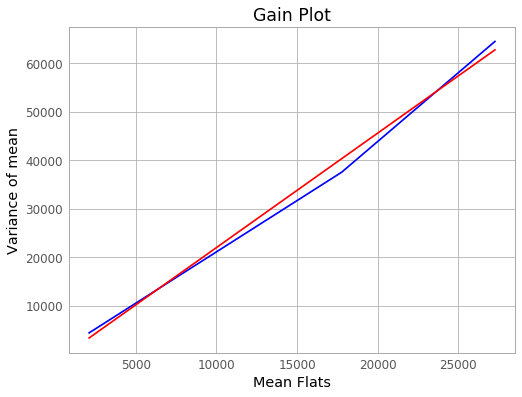

The gain:  0.4238612903014589 


In [70]:
x = np.array([mflats62, mflats170, mflats255]) #The means
y = np.array([varflats62, varflats170, varflats255]) #The variances

(a0,b0) = (0.5,0) #initial estimation parameters

def func0 (x,a,b): #The linear fit we are trying to find 
    return a*x+b

coeffs, fiterr = curve_fit(func0, x, y, p0 = (a0,b0)) #execute the curve fit 

print ("a=%s, b=%s" % (coeffs[0], coeffs[1]))
plt.plot(x,y, 'b') #Plot of the data
plt.plot(x, func0(x,coeffs[0],coeffs[1]),'r-') #Plot of the fit 
plt.xlabel("Mean Flats")
plt.ylabel("Variance of mean")
plt.title("Gain Plot")
plt.show()

gain = 1/coeffs[0]
print("The gain: ", gain, "") #This is true since our CCD follows Poisson statistics 


In [71]:
#We must solve for read noise, in order to do this we need gain, standard deviation, and variance 

gain = 1/coeffs[0]

variance = varbias

sd = np.sqrt(variance)

RN = (gain*sd)

print ("The Read Noise is: ", RN)



The Read Noise is:  8.476495616387554


# DAY 2 

In [ ]:
#In order to get an accurate value for our dark current we must subtract our measured bias from the data collected. 
#To do this we follow the same steps as DAY 1 and solve for the average bias, we then subtract this value from our 
#measured dark current and take the mean to get our final value

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit 


biasD2 = []
for i in range(1,41):
    biasD2.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/Bias_Day_2-" + "0"*(4-len(str(i))) + str(i) + ".fit", ext=0).astype(np.int))


In [73]:
np.array(biasD2).shape 

(40, 2504, 3326)

In [74]:
mbiasD2 = np.array(biasD2).mean(axis = 0)
print ("The average of the Day 2 Bias: ")
print (mbiasD2)

print ("Shape of the average array: ", np.array(mbias).shape)


The average of the Day 2 Bias: 
[[968.65  967.425 968.575 ... 970.9   967.275 966.25 ]
 [971.    967.025 969.825 ... 967.5   967.725 966.4  ]
 [961.7   968.    966.775 ... 966.525 968.375 970.95 ]
 ...
 [972.525 975.6   976.75  ... 969.75  977.2   976.625]
 [977.075 982.1   973.6   ... 975.3   975.975 976.025]
 [972.4   975.125 974.6   ... 976.325 967.9   972.1  ]]
Shape of the average array:  (2504, 3326)


In [75]:
#DARK CURRENT FOR Group AA (Tom, Sam, Michael, Ryan)
dc9 = [] 
t0 = 9 #In Celcius 
dc9.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/Dark_Day_2_9c-0001.fit", ext=0).astype(np.int))

dc6 = []
t00 = 6 #In Celcius 
dc6.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/Dark_Day_2_6c-0001.fit", ext=0).astype(np.int))


In [76]:
#Finding the dark current with no bias 

new_dc9 = dc9 - mbiasD2
new_dc6 = dc6 - mbiasD2

In [77]:
#Finding the averages of the new dark currents 

avg_dc9 = np.array(new_dc9).mean() / 300 #Divide by exposure time for the average
avg_dc6 = np.array(new_dc6).mean() / 900 #Divide by exposure time for the average 

print("The average dark current with a temperature of 9 degrees Celcius is ", avg_dc9)
print("The average dark current with a temperature of 6 degrees Celcius is ", avg_dc6)

The average dark current with a temperature of 9 degrees Celcius is  0.269941161489782
The average dark current with a temperature of 6 degrees Celcius is  0.2047005718891466


# Every other groups Dark Current (Same process as above) 

In [ ]:
#This is just a summary of what was done above thus comments are unnecessary and would be redundant 

In [78]:
#Group 1 
g1_dc9 = []
t1 = 9 #Celcius 
texp1 = 600 
g1_dc9.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/DarkT9exp600-0001.fit", ext=0).astype(np.int))

g1_dc6 = []
t11 = 6 #Degrees Celcius
texp11 = 600
g1_dc6.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/DarkT6exp600-0001.fit", ext=0).astype(np.int))


In [79]:
new_g1 = g1_dc9 - mbiasD2
new_g2 = g1_dc6 - mbiasD2 


In [80]:
avg_g1 = np.array(new_g1).mean() / 600 
avg_g2 = np.array(new_g2).mean() / 600 

print("The average dark current with a temperature of 9 degrees Celcius is ", avg_g1)
print("The average dark current with a temperature of 6 degrees Celcius is ", avg_g2)



The average dark current with a temperature of 9 degrees Celcius is  0.2514909861399551
The average dark current with a temperature of 6 degrees Celcius is  0.1916473170888092


In [81]:
#Group A 
A_dc = [] 
t2 = 8.9 #Degrees Celcius
texp2 = 300
A_dc.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/GroupADarkT8.9Exp300.fit", ext=0).astype(np.int))

A1_dc = []
t22 = 4.6 #Degrees Celcius
texp22 = 450 
A1_dc.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/GroupADarkT4.6Exp450.fit", ext=0).astype(np.int))

In [82]:
new_A = A_dc - mbiasD2
new_A1 = A1_dc - mbiasD2

In [83]:
avg_A = np.array(new_A).mean() / 300
avg_A1 = np.array(new_A1).mean() / 450 

print("The average dark current with a temperature of 9 degrees Celcius is ", avg_A)
print("The average dark current with a temperature of 6 degrees Celcius is ", avg_A1)



The average dark current with a temperature of 9 degrees Celcius is  0.2708644447096709
The average dark current with a temperature of 6 degrees Celcius is  0.20219539469794104


In [84]:
#Group BB
BB_dc = []
t3 = 8 #Degrees Celcius 
texp3 = 400 
BB_dc.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/GroupBBDarkT8Exp400.fit", ext=0).astype(np.int))

BB2_dc = []
t33 = 7 #Degrees Celcius 
texp33 = 400
BB2_dc.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/GroupBBDarkT7Exp400.fit", ext=0).astype(np.int))

In [85]:
new_BB = BB_dc - mbiasD2
new_BB2 = BB2_dc - mbiasD2

In [86]:
avg_BB = np.array(new_BB).mean() / 400 
avg_BB2 = np.array(new_BB2).mean() / 400 

print("The average dark current with a temperature of 9 degrees Celcius is ", avg_BB)
print("The average dark current with a temperature of 6 degrees Celcius is ", avg_BB2)


The average dark current with a temperature of 9 degrees Celcius is  0.22105449035601932
The average dark current with a temperature of 6 degrees Celcius is  0.20920186045682265


In [87]:
#Group B 
B1_dc = []
t4 = 9 #Celcius 
texp4 = 600 
B1_dc.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/GroupBDarkT9Exp600.fit", ext=0).astype(np.int))

B2_dc = []
t44 = 6 #Celcius 
texp44 = 300 
B2_dc.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/GroupBDarkT6Exp300.fit", ext=0).astype(np.int))



In [88]:
new_B1 = B1_dc - mbiasD2
new_B2 = B2_dc - mbiasD2 

In [89]:
avg_B1 = np.array(new_B1).mean () / 600 
avg_B2 = np.array(new_B2).mean() / 300 

print("The average dark current with a temperature of 9 degrees Celcius is ", avg_B1)
print("The average dark current with a temperature of 6 degrees Celcius is ", avg_B2)

The average dark current with a temperature of 9 degrees Celcius is  0.2675601027732258
The average dark current with a temperature of 6 degrees Celcius is  0.21947135635298617


In [90]:
#Group C
C1_dc = []
t5 = 9.4 #Celcius 
texp5 = 300 
C1_dc.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/GroupCDarkT9.4Exp300.fit", ext=0).astype(np.int))

C2_dc = []
t55 = 7.1 #Celcius 
texp55 = 400 
C2_dc.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/GroupCDarkT7.1Exp400.fit", ext=0).astype(np.int))

In [91]:
new_C1 = C1_dc - mbiasD2 
new_C2 = C2_dc - mbiasD2 

In [92]:
avg_C1 = np.array(new_C1).mean() / 300 
avg_C2 = np.array(new_C2).mean() / 400

print("The average dark current with a temperature of 9 degrees Celcius is ", avg_C1)
print("The average dark current with a temperature of 6 degrees Celcius is ", avg_C2)

The average dark current with a temperature of 9 degrees Celcius is  0.27432608988176505
The average dark current with a temperature of 6 degrees Celcius is  0.2268305676341782


In [93]:
#Group D 
D_dc = []
t6 = 9.4 #Celcius 
texp6 = 300 
D_dc.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/GroupDDarkT9.4Exp300.fit", ext=0).astype(np.int))

D1_dc = []
t66 = 7 #Celcius 
texp66 = 600 
D1_dc.append(fits.getdata("/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab4/Day 2/GroupDDarkT7Exp600.fit", ext=0).astype(np.int))

In [94]:
new_D = D_dc - mbiasD2 
new_D1 = D1_dc - mbiasD2

In [95]:
avg_D = np.array(new_D).mean() / 300 
avg_D1 = np.array(new_D1).mean() / 600 


print("The average dark current with a temperature of 9 degrees Celcius is ", avg_D)
print("The average dark current with a temperature of 6 degrees Celcius is ", avg_D1)

The average dark current with a temperature of 9 degrees Celcius is  0.2635133365688856
The average dark current with a temperature of 6 degrees Celcius is  0.21285191929032984


# Converting Temperature to Kelvin

In [ ]:
#In order to graph for the dark current constant and band gap energy we must convert our measured temperatures 
#from celcius into Kelvin

In [120]:
K = 273.15 #Conversion factor for Celcius to Kelvin 

T0 = t0 + K 
T00 = t00 + K 
print(T0,T00)

T1 = t1 + K 
T11 = t11 + K 
print(T1,T11)

T2 = t2 + K 
T22 = t22 + K 
print(T2,T22)

T3 = t3 + K 
T33 = t33 + K 
print(T3,T33)

T4 = t4 + K 
T44 = t44 + K 
print(T4,T44)

T5 = t5 + K 
T55 = t55 + K 
print(T5,T55)

T6 = t6 + K 
T66 = t66 + K 
print(T6,T66)





282.15 279.15
282.15 279.15
282.04999999999995 277.75
281.15 280.15
282.15 279.15
282.54999999999995 280.25
282.54999999999995 280.15


# Finding Dark Current constant and Band Gap Energy by Fitting Data 

In [ ]:
#To find the dark current constant and band gap energy we plot our Average Temperatures vs Average Dark Current and 
#fit the equation for dark current as an estimate. Using this we can estimate a value for both band gap enery and dark 
#current constant.

The Dark Current Constant =  1.0395417283313644
The Band Gap Energy =  106122.0614877996


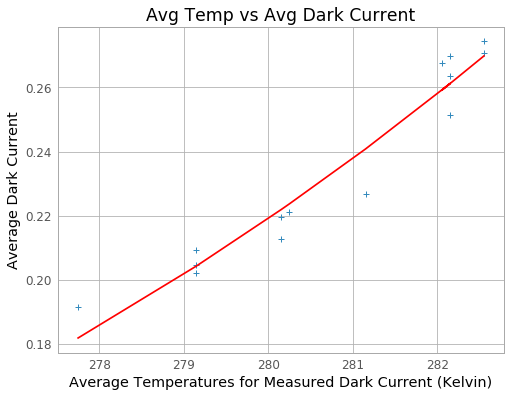

In [119]:
Temp = np.array([T22, T00, T11, T44, T33, T66, T55, T3, T4, T0, T2, T1, T5, T6]) #All temperatures listed in order in Kelvin 
D = np.array([avg_g2,avg_A1, avg_dc6, avg_BB2, avg_D1, avg_B2, avg_BB, avg_C2, avg_g1, avg_D, avg_B1, avg_dc9, avg_A, avg_C1]) #All the dark currents listed in order

k = 8.617e-5 #Boltzmann Constant for Dark Current 
(E0,A0) = (1.1,10**6) #The initial parameters we are estimating with 
def func1(T,A,E): #Our function that we will fit 
    return A*T**(3./2.)*np.exp((-E)/(2*k*T))

coeffs2, filterr2 = curve_fit(func1, Temp, D, p0=(A0,E0))
plt.plot(Temp,D, '+')
plt.plot(Temp, func1(Temp,coeffs2[0],coeffs2[1]), 'r-')
plt.xlabel("Average Temperatures for Measured Dark Current (Kelvin)")
plt.ylabel("Average Dark Current")
plt.title("Avg Temp vs Avg Dark Current")
print("The Dark Current Constant = ", coeffs2[1])
print("The Band Gap Energy = ", coeffs2[0])








